# Edge Detection - histogram equalization

# 直方圖均衡化

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#### 原圖 (grayscale)

原圖 histogram&cdf計算

In [2]:
def his_cdf (img): #histogram&cdf計算和展示
    plt.figure(figsize=(20,5))

    hist, bins = np.histogram(img.flatten(), 256, [0,256]) 
    #print(hist)
    #print(bins)
    cdf = hist.cumsum()#累加值
    cdf_normalized = cdf/cdf.max() #展現比例，cdf.max()為1

    #畫圖
    plt.subplot(1,2,1)
    plt.plot(cdf_normalized, color = 'b')
    plt.title('cdf')
    plt.xlim([0,256])
    plt.subplot(1,2,2)
    plt.hist(img.flatten(),256,[0,256], color = 'r')
    plt.title('histogram')
    plt.xlim([0,256])

    plt.show()
    return cdf

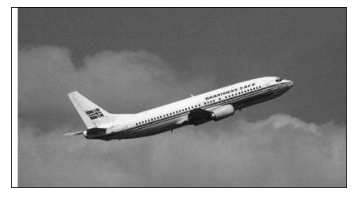

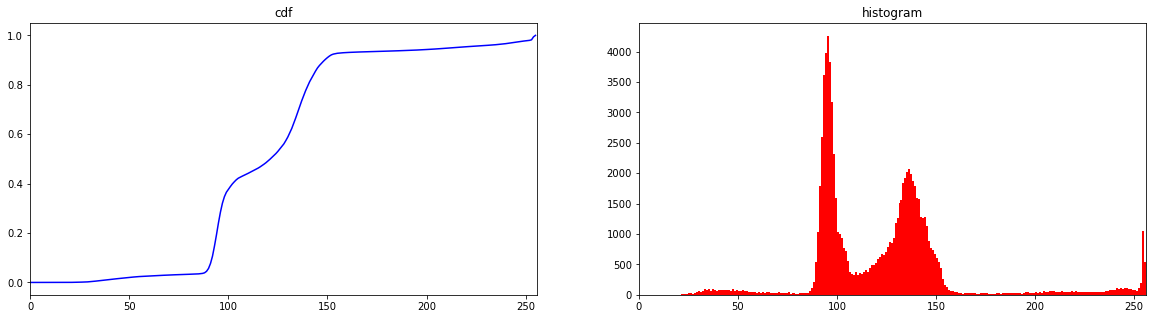

In [3]:
img = cv2.imread('1.jpg',0)
plt.imshow(img,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()
cdf=his_cdf(img)

### 直方圖均衡化計算

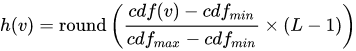



In [4]:
L=256 #灰階級數

In [5]:
def his_equalization(img,cdf):
    cdf_m = np.ma.masked_equal(cdf, 0) #除去0來看
    cdf_m=((cdf_m-cdf.min())/(cdf.max()-cdf.min()))*(L-1)
    cdf = np.ma.filled(cdf_m, 0).astype('uint8') #其餘填0，默認的dtype是float 轉成int

    img2 = cdf[img] 
    return img2

直方圖均衡化後 histogram&cdf

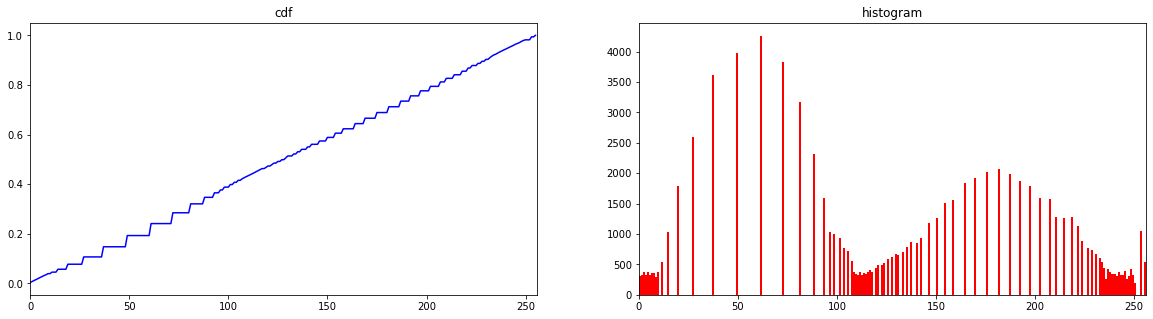

In [6]:
img2=his_equalization(img,cdf)
cdf2=his_cdf(img2)

直方圖均衡化處理前後

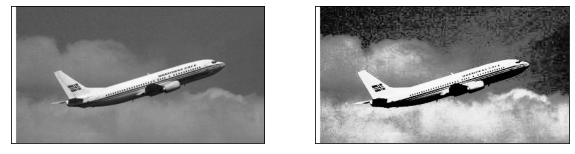

True

In [7]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(img2,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

cv2.imwrite('his_1.jpg', img2) #存檔

--------------------
--------------------
--------------------
### 重複以上步驟處理圖二

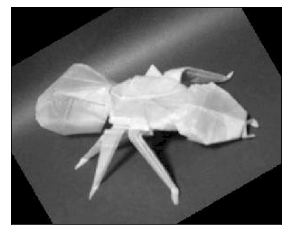

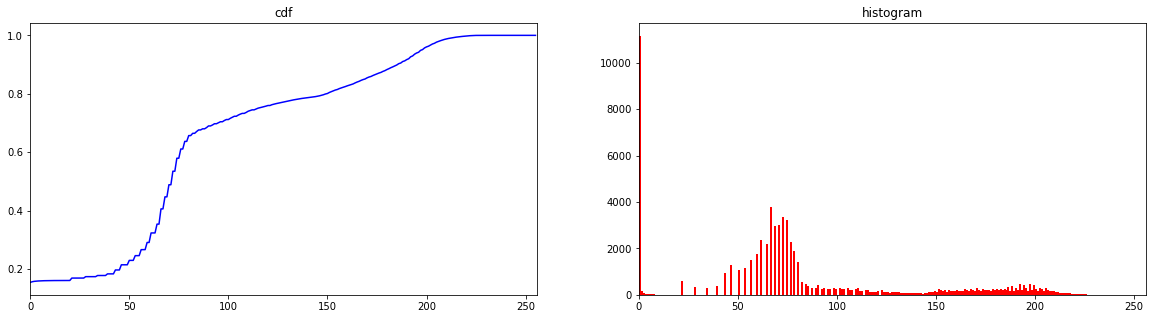

In [8]:
img = cv2.imread('1.png',0)
plt.imshow(img,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()
cdf=his_cdf(img)

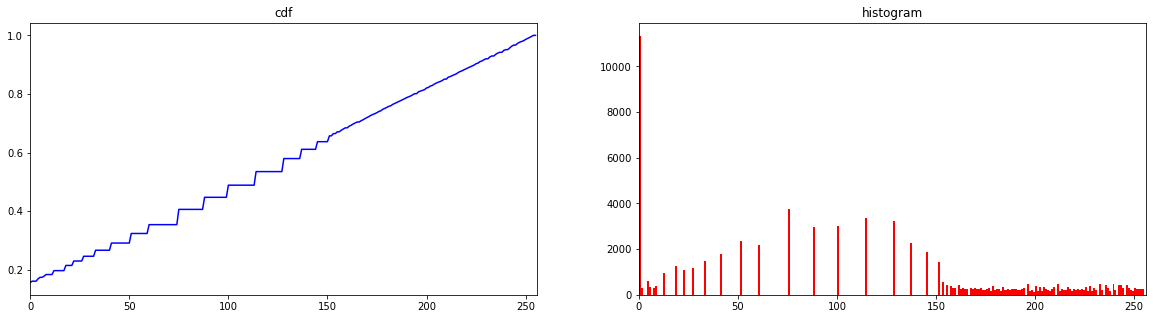

In [9]:
img2=his_equalization(img,cdf)
cdf2=his_cdf(img2)

直方圖均衡化處理前後

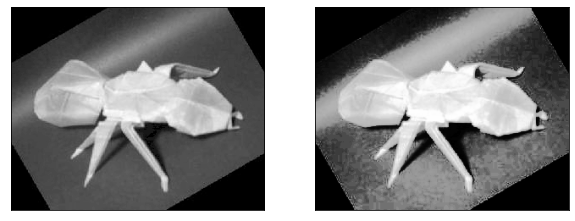

True

In [10]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(img2,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

cv2.imwrite('his_1.png', img2) #存檔

# Edge Detection - blur

因為使用histogram處理後的圖片，雜訊放大->不必要的地方也被偵測到了  
SMOOTH:Gaussian filter 

可以使用BLUR，將圖片模糊後再偵測邊緣(原圖經處理也能有更好的效果)

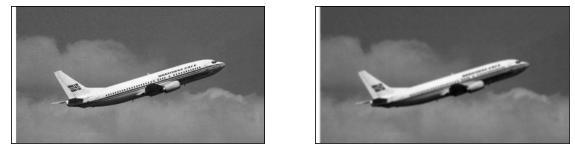

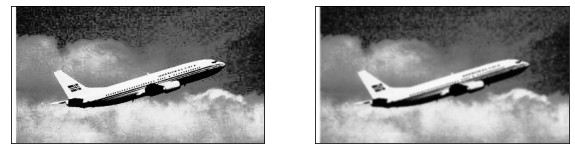

In [11]:
plt.figure(figsize=(10,5))
img = cv2.imread("1.jpg",0);
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.xticks([]), plt.yticks([])

blur = cv2.GaussianBlur(img,(5,5),0) #模糊半徑=5
plt.subplot(1,2,2)
plt.imshow(blur,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite("blur_1.jpg", blur);

plt.figure(figsize=(10,5))
img = cv2.imread("his_1.jpg",0);
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.xticks([]), plt.yticks([])

blur = cv2.GaussianBlur(img,(5,5),0) #模糊半徑=5
plt.subplot(1,2,2)
plt.imshow(blur,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite("blurhis_1.jpg", blur);

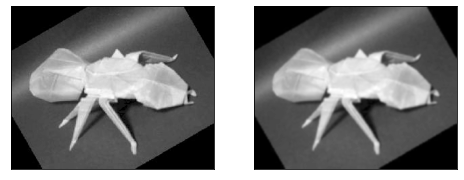

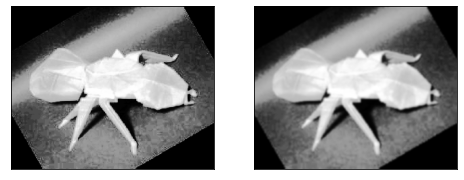

In [12]:
plt.figure(figsize=(8,5))
img = cv2.imread("1.png",0);
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.xticks([]), plt.yticks([])

blur = cv2.GaussianBlur(img,(5,5),0) #模糊半徑=5
plt.subplot(1,2,2)
plt.imshow(blur,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite("blur_1.png", blur);

plt.figure(figsize=(8,5))
img = cv2.imread("his_1.png",0);
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.xticks([]), plt.yticks([])

blur = cv2.GaussianBlur(img,(5,5),0) #模糊半徑=5
plt.subplot(1,2,2)
plt.imshow(blur,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite("blurhis_1.png", blur);

# Edge Detection - sobel operator

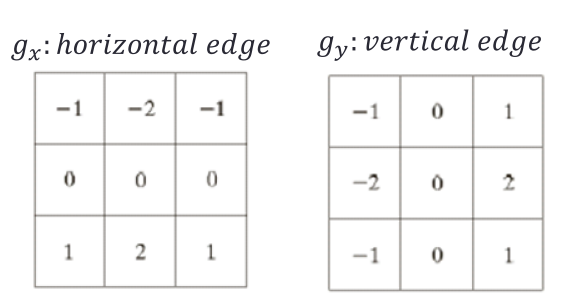

圖像的每一個像素的橫向及縱向梯度近似值可用以下的公式結合，來計算梯度的大小。

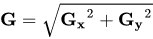

In [13]:
def sobel(img,threshold):
    r,c= img.shape #長，寬
    g = np.zeros((r, c))  
    gX = np.zeros(img.shape)  
    gY = np.zeros(img.shape)  
    sobel_X = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])  
    sobel_Y = np.array([[-1,0,1],[-2,0,2],[-1,0,1]]) 
    
    #計算在橫&縱的梯度 也就是和sobel_X、sobel_Y的捲積
    for i in range(r-2):  
        for j in range(c-2):
            gX[i+1, j+1] = abs(np.sum(img[i:i+3, j:j+3] * sobel_X))  
            gY[i+1, j+1] = abs(np.sum(img[i:i+3, j:j+3] * sobel_Y))  
            
            g[i+1, j+1] = (gX[i+1, j+1]*gX[i+1,j+1] + gY[i+1, j+1]*gY[i+1,j+1])**0.5 #平方相加開根號
            
    
    g = g*255.0 / g.max() #正規化到0~255
    
    
    #這段選擇要使用閾值判斷邊界，大於閾值則為邊界 註解後不設閾值
    '''
    #print(np.max(g))
    #print(np.min(g))
    for p in range(r):  
        for q in range(c): 
            if g[p, q] < threshold: #大於閾值則為邊界
                g[p, q] = 0
    '''
                
    return np.uint8(g) #像素值0~255 -> unit8

### 比較原圖及模糊前後的邊緣檢測
#### 使用同個funcion"sobel"

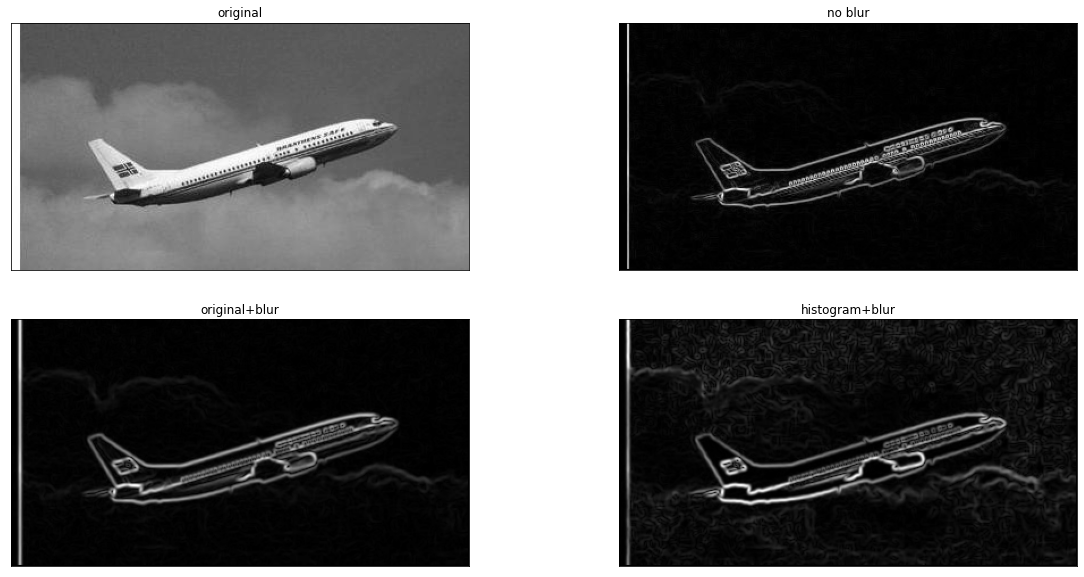

In [14]:
plt.figure(figsize=(20,10))
img = cv2.imread('1.jpg', cv2.IMREAD_GRAYSCALE)  
plt.subplot(2,2,1)
plt.title('original')
plt.imshow(img,cmap='gray')
plt.xticks([]), plt.yticks([])
  
out_sobel = sobel(img,10)
plt.subplot(2,2,2)
plt.title('no blur')
plt.imshow(out_sobel,cmap='gray')
plt.xticks([]), plt.yticks([])

img = cv2.imread('blur_1.jpg', cv2.IMREAD_GRAYSCALE)
out_sobel = sobel(img,20)
plt.subplot(2,2,3)
plt.title('original+blur')
plt.imshow(out_sobel,cmap='gray')
plt.xticks([]), plt.yticks([])

img = cv2.imread('blurhis_1.jpg', cv2.IMREAD_GRAYSCALE)
out_sobel = sobel(img,30)
plt.subplot(2,2,4)
plt.title('histogram+blur')
plt.imshow(out_sobel,cmap='gray')
plt.xticks([]), plt.yticks([])

plt.show()

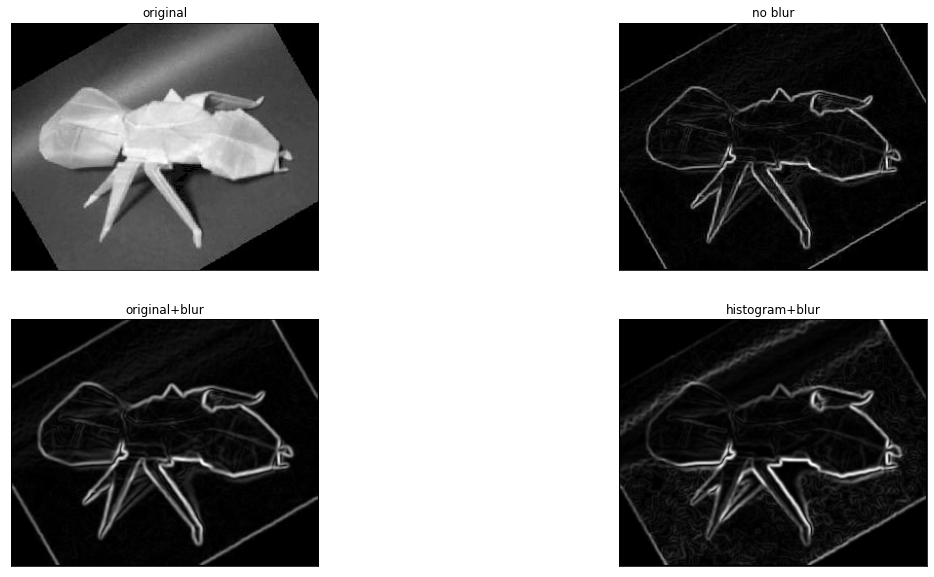

In [15]:
plt.figure(figsize=(20,10))
img = cv2.imread('1.png', cv2.IMREAD_GRAYSCALE)  
plt.subplot(2,2,1)
plt.title('original')
plt.imshow(img,cmap='gray')
plt.xticks([]), plt.yticks([])

out_sobel = sobel(img,20)
plt.subplot(2,2,2)
plt.title('no blur')
plt.imshow(out_sobel,cmap='gray')
plt.xticks([]), plt.yticks([])

img = cv2.imread('blur_1.png', cv2.IMREAD_GRAYSCALE)
out_sobel = sobel(img,20)
plt.subplot(2,2,3)
plt.title('original+blur')
plt.imshow(out_sobel,cmap='gray')
plt.xticks([]), plt.yticks([])

img = cv2.imread('blurhis_1.png', cv2.IMREAD_GRAYSCALE)
out_sobel = sobel(img,20)
plt.subplot(2,2,4)
plt.title('histogram+blur')
plt.imshow(out_sobel,cmap='gray')
plt.xticks([]), plt.yticks([])

plt.show()

### BONUS:CLAHE (自適應直方圖均衡化)

對每個小塊進行直方圖均衡

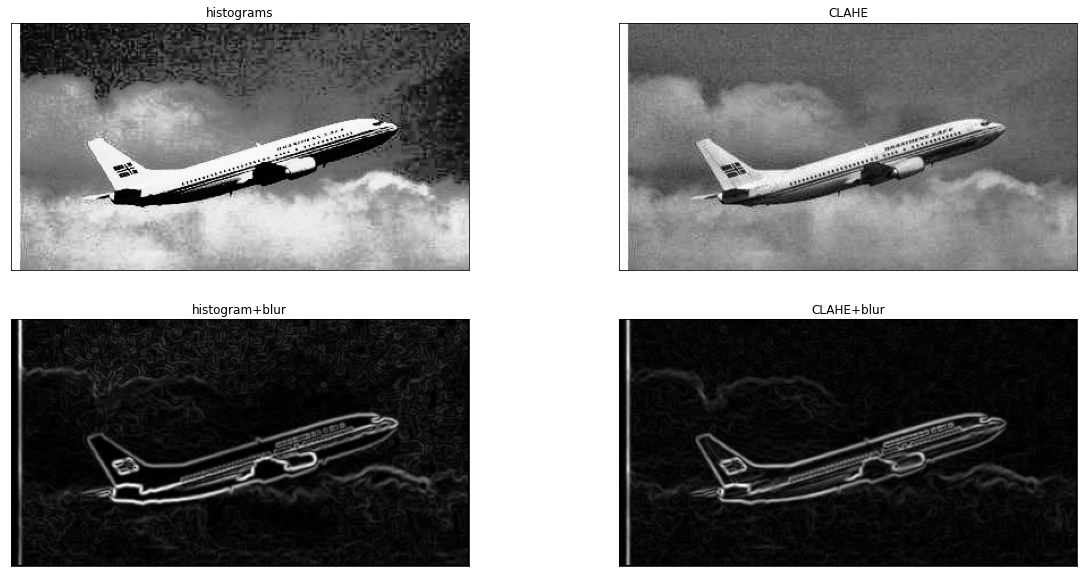

In [16]:
import numpy as np
import cv2

plt.figure(figsize=(20,10))
img = cv2.imread('1.jpg',0)


#Histogram後
img2 = cv2.imread('his_1.jpg',0) 
plt.subplot(2,2,1)
plt.title('histograms')
plt.imshow(img2,cmap='gray')
plt.xticks([]), plt.yticks([])

#CLAHE後
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)) # clipLimit顏色對比度的閾值
cl1 = clahe.apply(img)
plt.subplot(2,2,2)
plt.title('CLAHE')
plt.imshow(cl1,cmap='gray')
plt.xticks([]), plt.yticks([])
cv2.imwrite('11.jpg',cl1)

blur = cv2.GaussianBlur(cl1,(5,5),0) #模糊半徑=5

#Histogram後邊界
img = cv2.imread('blurhis_1.jpg', cv2.IMREAD_GRAYSCALE)
out_sobel = sobel(img,20)
plt.subplot(2,2,3)
plt.title('histogram+blur')
plt.imshow(out_sobel,cmap='gray')
plt.xticks([]), plt.yticks([])

#CLAHE後邊界
out_sobel = sobel(blur ,30)
plt.subplot(2,2,4)
plt.title('CLAHE+blur')
plt.imshow(out_sobel,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

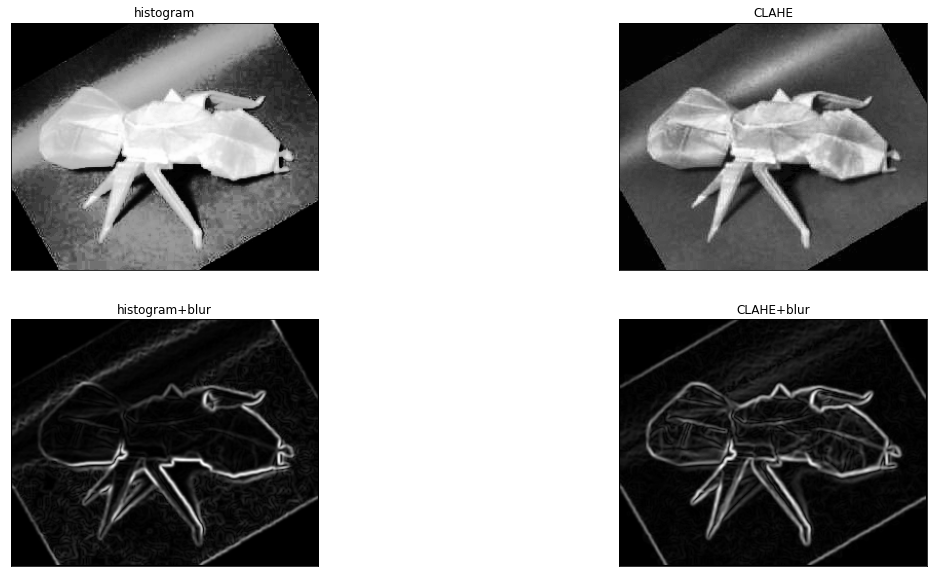

In [17]:
import numpy as np
import cv2

plt.figure(figsize=(20,10))
img = cv2.imread('1.png',0)


#Histogram後
img2 = cv2.imread('his_1.png',0) 
plt.subplot(2,2,1)
plt.title('histogram')
plt.imshow(img2,cmap='gray')
plt.xticks([]), plt.yticks([])

#CLAHE後
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)) # clipLimit顏色對比度的閾值
cl1 = clahe.apply(img)
plt.subplot(2,2,2)
plt.title('CLAHE')
plt.imshow(cl1,cmap='gray')
plt.xticks([]), plt.yticks([])
cv2.imwrite('11.png',cl1)

blur = cv2.GaussianBlur(cl1,(5,5),0) #模糊半徑=5

#Histogram後邊界
img = cv2.imread('blurhis_1.png', cv2.IMREAD_GRAYSCALE)
out_sobel = sobel(img,20)
plt.subplot(2,2,3)
plt.title('histogram+blur')
plt.imshow(out_sobel,cmap='gray')
plt.xticks([]), plt.yticks([])

#CLAHE後邊界
out_sobel = sobel(blur ,30)
plt.subplot(2,2,4)
plt.title('CLAHE+blur')
plt.imshow(out_sobel,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()